In [73]:
import pandas as pd
import numpy as np
import seaborn as sns

In [74]:
colors = pd.read_csv('data/colors.csv')
inventories = pd.read_csv('data/inventories.csv')
inventory_parts = pd.read_csv('data/inventory_parts.csv')
inventory_sets = pd.read_csv('data/inventory_sets.csv')
part_categories = pd.read_csv('data/part_categories.csv')
parts = pd.read_csv('data/parts.csv')
lego_sets = pd.read_csv('data/sets.csv')
themes = pd.read_csv('data/themes.csv')

# Sets

In [75]:
lego_sets.head()

set_num                        name  year  theme_id  num_parts
0    00-1             Weetabix Castle  1970       414        471
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          2
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12

In [76]:
lego_sets.describe()

year      theme_id     num_parts
count  11673.000000  11673.000000  11673.000000
mean    2001.972758    311.308575    162.262400
std       13.475364    177.999101    330.192108
min     1950.000000      1.000000     -1.000000
25%     1997.000000    161.000000     10.000000
50%     2005.000000    324.000000     45.000000
75%     2012.000000    470.000000    172.000000
max     2017.000000    614.000000   5922.000000

In [77]:
lego_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    11673 non-null  object
 1   name       11673 non-null  object
 2   year       11673 non-null  int64 
 3   theme_id   11673 non-null  int64 
 4   num_parts  11673 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 456.1+ KB


Text(0.5, 1.0, 'Volume of Lego Sets Released by Year')

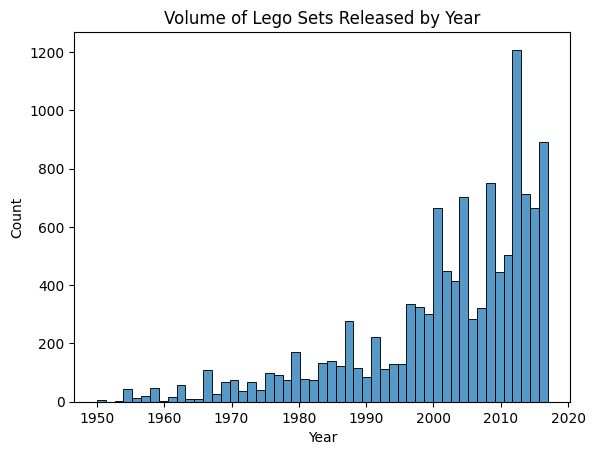

In [78]:
fig = sns.histplot(lego_sets['year'])
fig.set_xlabel('Year')
fig.set_title('Volume of Lego Sets Released by Year')

Text(0.5, 1.0, 'Average Number of Parts for One Set by Year')

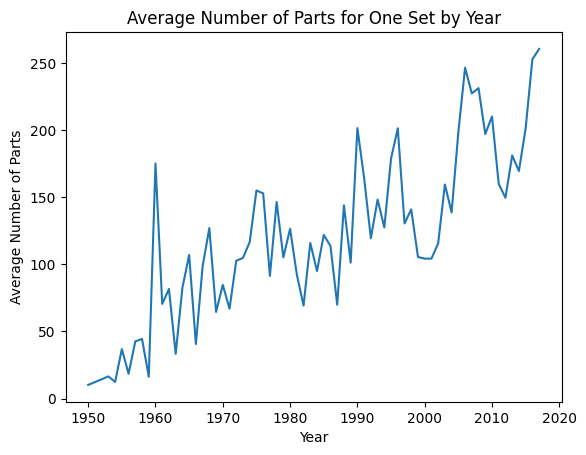

In [79]:
avg_pts_year = lego_sets.groupby('year')['num_parts'].mean()

fig = sns.lineplot(avg_pts_year)
fig.set_ylabel('Average Number of Parts')
fig.set_xlabel('Year')
fig.set_title('Average Number of Parts for One Set by Year')

In [80]:
lego_sets.head()

set_num                        name  year  theme_id  num_parts
0    00-1             Weetabix Castle  1970       414        471
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          2
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12

In [81]:
themes.head()

id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0

In [82]:
# merge lego sets and themes dataframs so each set has a theme
merged_df = pd.merge(lego_sets, themes, left_on='theme_id', right_on='id', how='inner')

# drop id used in merging 
merged_df = merged_df.drop(['id', 'theme_id', 'parent_id'], axis=1)

# rename name columns for comprehension
new_col_names = {'name_x':'set_name', 'name_y':'theme'}
merged_df.rename(columns=new_col_names, inplace=True)

In [83]:
merged_df.head()

set_num                set_name  year  num_parts         theme
0    00-1         Weetabix Castle  1970        471        Castle
1  0011-2       Town Mini-Figures  1978         12  Supplemental
2  2181-1              Infomaniac  1997          4  Supplemental
3   300-1  T-Junction Road Plates  1978          2  Supplemental
4   301-1      Curved Road Plates  1978          2  Supplemental

In [87]:
merged_df.theme.nunique()

386

Text(0.5, 1.0, 'Total Lego Themes per Year')

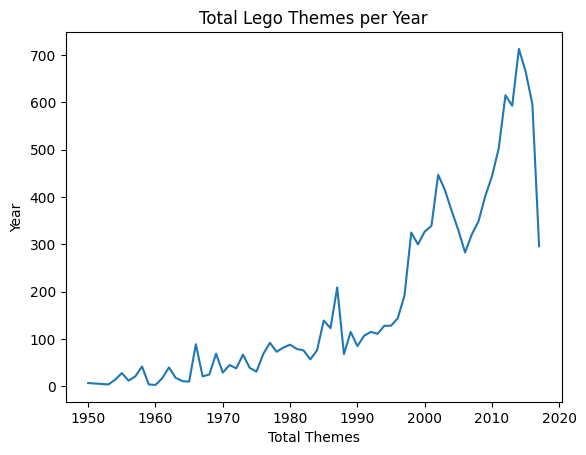

In [92]:
themes_by_year = merged_df.groupby('year')['theme'].count()

fig = sns.lineplot(themes_by_year)

fig.set_xlabel('Total Themes')
fig.set_ylabel('Year')
fig.set_title('Total Lego Themes per Year')